In [31]:
import pandas as pd 
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

In [35]:
#Used the following article for yfinance examples
#https://towardsdatascience.com/historical-stock-price-data-in-python-a0b6dc826836
# Define the ticker list
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']
# Fetch the data
data = yf.download(tickers_list,'1990-1-1')['Adj Close']
# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  6 of 6 completed
                AAPL       AXP         BA        IBM        MU       WMT
Date                                                                    
1990-01-02  0.264482  5.069034  11.043634  10.509353  0.970745  3.667141
1990-01-03  0.266257  5.123539  11.312987  10.603187  0.995014  3.667141
1990-01-04  0.267145  5.069034  11.268094  10.723835  0.982879  3.647685
1990-01-05  0.268033  5.014530  11.110962  10.697027  0.958611  3.608778
1990-01-08  0.269808  4.978192  11.245646  10.764046  0.946477  3.657413


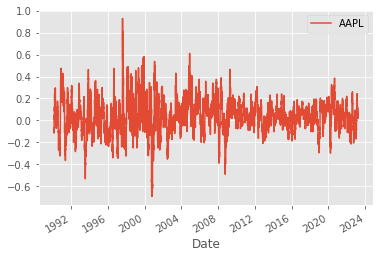

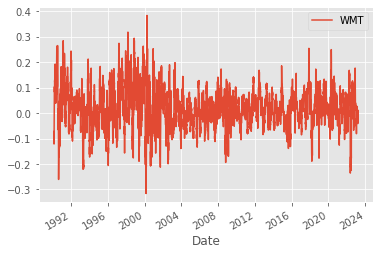

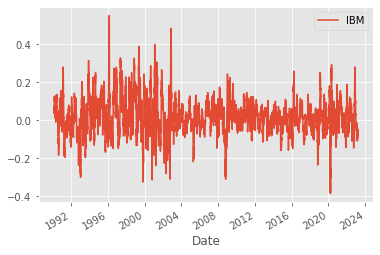

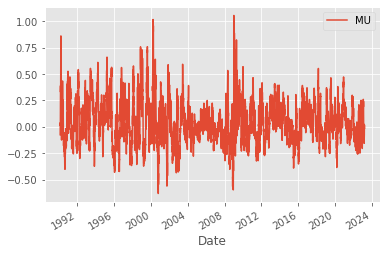

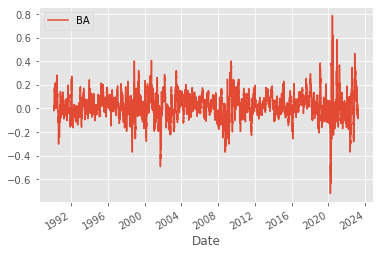

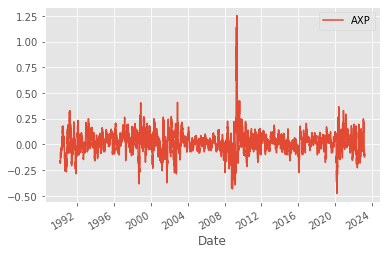

In [36]:
df = data.copy()
plt.style.use('ggplot')
control_lag = 5
pct_int = 252
cut = control_lag+pct_int
df = df.pct_change(30)
reg_list = list()

for var in tickers_list:   
    
    df.plot(y=var, use_index=True, kind='line')
    
    for lag in range(0,control_lag):
        lagname = f'{var}_L{lag}'
        df[lagname] = df[var].shift(lag)
        reg_list.append(lagname)
   
   
        

In [47]:
mask = df.columns.str.contains('AAPL.*')
mid_dat = '01-01-2013'
X = df.loc['01-01-1992':mid_dat,mask] # selects mask
X_test = df.loc[mid_dat:'01-01-2020',mask] # selects mask
all_dat = df.loc['01-01-1992':'01-01-2020',mask] 
# Initialize k-means clustering with k=3 clusters
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")

# Fit the clustering algorithm to the data
train_fit = km.fit(X)
test_fit = km.predict(X_test)

labels_sample = train_fit.labels_
labels_test = test_fit

labels = np.concatenate((labels_sample,labels_test), axis=0)

# Get the cluster labels and centroids
# labels = km.labels_
# centroids = km.cluster_centers_

/Users/wcrossb/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1762 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


,AAPL,AAPL_L0,AAPL_L1,AAPL_L2,AAPL_L3,AAPL_L4,labels,future_ret
colormap,,,,,,,,
b,0.164153,0.164153,0.165342,0.165630,0.163373,0.159835,0.0,0.157647
g,-0.126076,-0.126076,-0.127077,-0.127875,-0.128281,-0.126944,1.0,-0.122077
r,0.034589,0.034589,0.034524,0.034497,0.034755,0.034890,2.0,0.034803


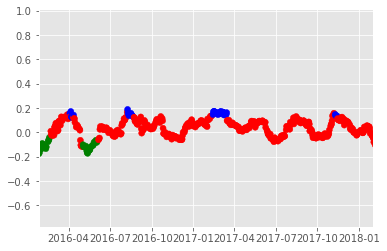

In [51]:
import datetime
df_est = pd.DataFrame(labels)
df_est.columns = ['labels']
data_temp = all_dat.reset_index(drop=False)
dfp = pd.concat([data_temp, df_est.reset_index(drop=True)], axis =1)
dfp['Date'] = pd.to_datetime(dfp['Date'])
dfp= dfp.set_index(['Date'])

colors = {0:"b", 1:"g", 2:"r"}
dfp['colormap'] = dfp['labels'].map(colors)

plt.scatter(dfp.index, dfp['AAPL'], c= dfp['colormap'])
plt.xlim([datetime.date(2016, 1, 26), datetime.date(2018, 2, 1)])


dfp['future_ret'] = dfp['AAPL'].shift(-1)

dfp_test = dfp.loc[mid_dat:'01-01-2020'] # selects mask

test = dfp_test.groupby('colormap').mean()
test.head()


In [ ]:
"""
Step 1: extract the signal
Step 2: test the signal 

Code must:
Start with the indicator data 
Also define a tradeable asset 
These two DS should be the same length 

Take the indicator data (unmodified)
Apply relevant transformations 
Perhaps multiple transformations of the same series 
Also add in lags and other variables as needed
Apply the train test split 
Train on the data and produce the test labels

This concluded step 1 

Step 2:

Need to choose what to do with the signal
when should you buy? 
and should it tell the user to buy or sell 

use a +1,-1 itertools with lag lengths 

Need to pass this into the test function which will test different starting points as well 

Need to find a proper way to backtest? There is probably a good library for it 


Impose a time series train test split 
compute the k means on train data

Apply the same rule to the test data, test a strategy using the different measures as buy/sell signals 



"""